In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [12]:
boston_df.head(15)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


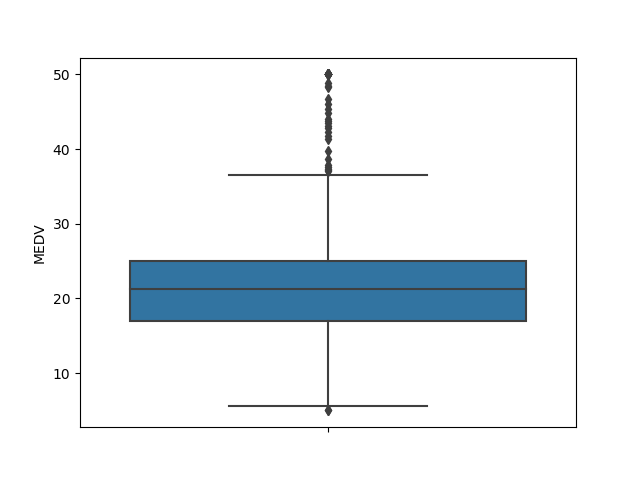

In [13]:
ax=sns.boxplot(y='MEDV', data=boston_df)
plt.show()

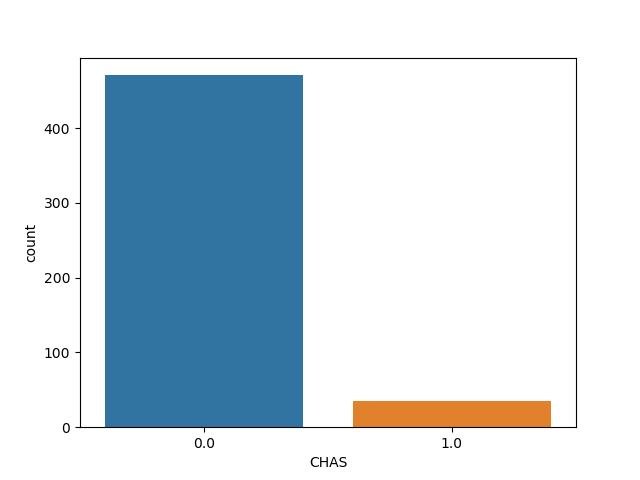

In [19]:
ax2 = sns.countplot(x = 'CHAS', data = boston_df)
plt.show()

In [25]:
boston_df.loc[boston_df['AGE']<=35, 'age_group'] = 'age<=35'
boston_df.loc[boston_df['AGE'].between(35,70), 'age_group'] = 'age>35-70'
boston_df.loc[boston_df['AGE']>70, 'age_group'] = 'age>70'


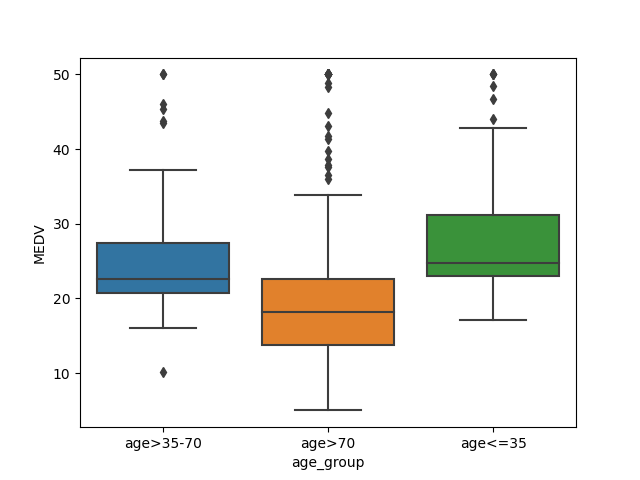

In [28]:
ax3 = sns.boxplot(y='MEDV',x='age_group', data=boston_df)
plt.show()

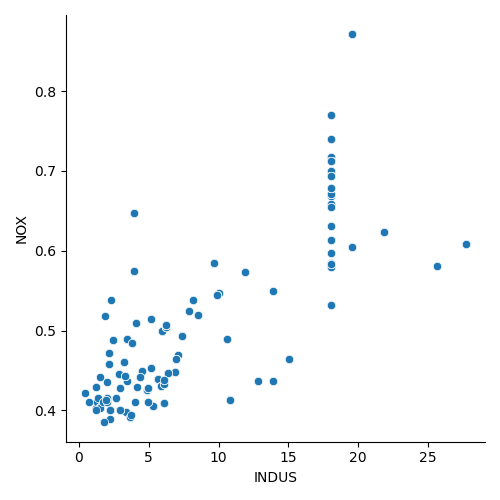

In [29]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?

ax4 = sns.relplot(x="INDUS", y="NOX", data=boston_df) 
plt.show()

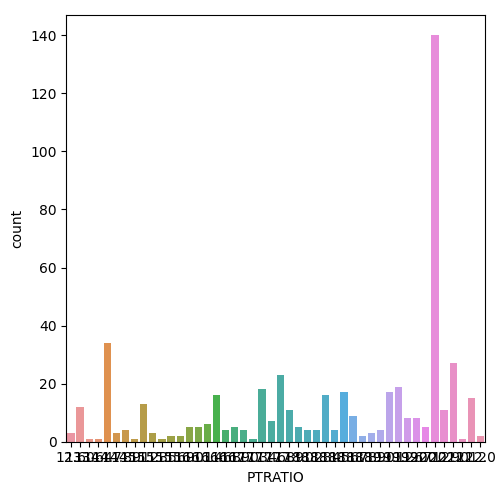

In [31]:
#Create a histogram for the pupil to teacher ratio variable

ax5 = sns.countplot(x = 'PTRATIO', data=boston_df)
plt.show()

In [33]:
chk = boston_df.groupby(['CHAS'])['CHAS'].count()
chk

CHAS
0.0    471
1.0     35
Name: CHAS, dtype: int64

In [6]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_GRP'] = 'CHAS_GRP0'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_GRP'] = 'CHAS_GRP1'

In [7]:
chk = boston_df.groupby(['CHAS_GRP'])['CHAS_GRP'].count()
chk

CHAS_GRP
CHAS_GRP0    471
CHAS_GRP1     35
Name: CHAS_GRP, dtype: int64

In [8]:

import scipy.stats
import statsmodels.api as sm


In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_GRP'] == 'CHAS_GRP1']['MEDV'], 
                      boston_df[boston_df['CHAS_GRP'] == 'CHAS_GRP0']['MEDV'], equal_var = True)
#p value lower than 0.05 to reject hyothesis

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [11]:
#Null Hypotesis: statistically differ in MEDV for each proportion of owner occpied units built prior to 1940
#Alternative Hypothesis: statistically no differ in MEDV for each proportion of owner occpied units built prior to 1940
#will fail to accept the Null Hypothesis if p-value is less than 0.05

from statsmodels.formula.api import ols
model = ols('MEDV ~ AGE', data = boston_df).fit()
result_table = sm.stats.anova_lm(model)
print(result_table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [14]:
#Can we conclude that there is no relationship between Nitric oxide concentrations
#and proportion of non-retail business acres per town? (Pearson Correlation)

#Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town
#will fail to accept the Null Hypothesis if p-value is less than 0.05

result2 = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
result2

(0.7636514469209189, 7.913361061211254e-98)

In [15]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

rel1 = sm.OLS(y, x).fit()
predisction = model.predict(x)

rel1.summary()

<class 'patsy.PatsyError'>: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'AGE' is not defined
    MEDV ~ AGE
           ^^^